<a href="https://colab.research.google.com/github/manuelarturomezagarcia/meni/blob/main/Copia_de_Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
data_yaml = """\
path: /content
train: imagenes/train
val: imagenes/vals

names:
  0: arma
"""

with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ Archivo 'data.yaml' creado correctamente.")


✅ Archivo 'data.yaml' creado correctamente.


In [3]:
import os
import random
import shutil
from glob import glob

# Crear carpetas de validación si no existen
os.makedirs('/content/imagenes/vals', exist_ok=True)
os.makedirs('/content/labels/vals', exist_ok=True)

# Obtener todas las imágenes del train
image_paths = glob('/content/imagenes/train/*.jpg') + glob('/content/imagenes/train/*.png')
random.shuffle(image_paths)

# Usar el 20% para validación
val_count = max(1, int(len(image_paths) * 0.2))  # al menos 1
val_images = image_paths[:val_count]

# Mover imágenes y sus etiquetas
for img_path in val_images:
    file_name = os.path.basename(img_path)
    txt_name = os.path.splitext(file_name)[0] + '.txt'

    src_img = f"/content/imagenes/train/{file_name}"
    src_lbl = f"/content/labels/train/{txt_name}"

    dst_img = f"/content/imagenes/vals/{file_name}"
    dst_lbl = f"/content/labels/vals/{txt_name}"

    # Mover archivos
    if os.path.exists(src_img):
        shutil.move(src_img, dst_img)
    if os.path.exists(src_lbl):
        shutil.move(src_lbl, dst_lbl)

print(f"✅ Se movieron {val_count} imágenes y etiquetas a 'vals'.")


✅ Se movieron 1 imágenes y etiquetas a 'vals'.


In [5]:
data_yaml = """\
train: /content/dataset/train/images
val: /content/dataset/valid/images

nc: 1
names: ['arma']
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ Archivo 'data.yaml' creado correctamente.")


✅ Archivo 'data.yaml' creado correctamente.


In [9]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # o 'yolov8s.pt', etc.
model.train(data='/content/dataset/data.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/dataset/train/labels.cache... 37 images, 20 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1042.5±387.1 MB/s, size: 43.5 KB)



val: Scanning /content/dataset/valid/labels.cache... 8 images, 8 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.008      2.982       1.58         18        640: 100%|██████████| 4/4 [01:00<00:00, 15.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9    0.00187          1      0.141     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.6952      2.637      1.281         15        640: 100%|██████████| 4/4 [00:47<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9    0.00187          1        0.4      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8143      2.493      1.394          8        640: 100%|██████████| 4/4 [00:47<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9    0.00187          1       0.43      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8347      2.098      1.407         14        640: 100%|██████████| 4/4 [00:47<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]

                   all         16          9    0.00187          1      0.489      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      0.793      1.906      1.307         20        640: 100%|██████████| 4/4 [00:50<00:00, 12.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         16          9    0.00187          1      0.706      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.7591      1.796      1.342         15        640: 100%|██████████| 4/4 [00:52<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         16          9    0.00187          1      0.783      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.7814      1.986      1.366          8        640: 100%|██████████| 4/4 [00:48<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]

                   all         16          9    0.00187          1      0.688      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      0.684      1.752      1.252         14        640: 100%|██████████| 4/4 [00:47<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         16          9    0.00269          1      0.521      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8282      1.756      1.346         18        640: 100%|██████████| 4/4 [00:47<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.59s/it]

                   all         16          9       0.12          1      0.575       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8636      2.077      1.425          9        640: 100%|██████████| 4/4 [00:47<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]

                   all         16          9      0.812      0.485      0.687      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.9483      1.873      1.438         15        640: 100%|██████████| 4/4 [00:47<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.48s/it]

                   all         16          9      0.595      0.494      0.656      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9107      1.924      1.425         16        640: 100%|██████████| 4/4 [00:47<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.40s/it]

                   all         16          9       0.69      0.333      0.543      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9502       1.87      1.486         11        640: 100%|██████████| 4/4 [00:48<00:00, 12.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all         16          9      0.744      0.667      0.573      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.9566      1.855      1.451         13        640: 100%|██████████| 4/4 [00:49<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         16          9      0.733      0.667      0.606       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.8923      1.762      1.412         17        640: 100%|██████████| 4/4 [00:48<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]

                   all         16          9      0.438      0.522      0.398      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.8915      1.726      1.454         13        640: 100%|██████████| 4/4 [00:48<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         16          9      0.399      0.444      0.435      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7109      1.478       1.29         13        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9      0.542      0.556      0.441      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8155      1.551      1.359         17        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]

                   all         16          9      0.161      0.333      0.239      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9018      1.676      1.414         14        640: 100%|██████████| 4/4 [00:47<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         16          9       0.12       0.41      0.107     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9702      1.521      1.414         19        640: 100%|██████████| 4/4 [00:46<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.34s/it]

                   all         16          9      0.129      0.333      0.146     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8457      1.471      1.388         19        640: 100%|██████████| 4/4 [00:47<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.23s/it]

                   all         16          9      0.321      0.222      0.195     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.9157      1.824      1.466          9        640: 100%|██████████| 4/4 [00:49<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]

                   all         16          9      0.246      0.333      0.185     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7916      1.566      1.356         16        640: 100%|██████████| 4/4 [00:48<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         16          9      0.168      0.333      0.158     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.7736      1.405      1.332         17        640: 100%|██████████| 4/4 [00:48<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9      0.179      0.333      0.143     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8388      1.504      1.354         14        640: 100%|██████████| 4/4 [00:48<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9      0.159      0.333      0.119       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8878      1.435      1.419         14        640: 100%|██████████| 4/4 [00:47<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

                   all         16          9       0.58      0.222      0.202      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8018      1.473      1.274         16        640: 100%|██████████| 4/4 [00:46<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

                   all         16          9      0.229      0.111     0.0797     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.8443       1.64      1.372         10        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]

                   all         16          9      0.122      0.356      0.115      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8677      1.436      1.374         19        640: 100%|██████████| 4/4 [00:46<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.35s/it]

                   all         16          9      0.151      0.333      0.146     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8682      1.366      1.354         13        640: 100%|██████████| 4/4 [00:47<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]

                   all         16          9      0.224      0.444      0.171     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7775      1.288      1.265         19        640: 100%|██████████| 4/4 [00:48<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.54s/it]

                   all         16          9      0.299      0.444       0.21     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8536      1.618      1.486         11        640: 100%|██████████| 4/4 [00:48<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9      0.279      0.444      0.217       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7161      1.282      1.249         17        640: 100%|██████████| 4/4 [00:47<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         16          9      0.341      0.556      0.337      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.699      1.217      1.227         19        640: 100%|██████████| 4/4 [00:47<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9      0.315      0.667      0.311      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6972       1.27      1.257         17        640: 100%|██████████| 4/4 [00:47<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         16          9      0.291      0.556      0.305      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.8093      1.389      1.389         12        640: 100%|██████████| 4/4 [00:47<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.91s/it]

                   all         16          9      0.646      0.667      0.636      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6662      1.184       1.24         15        640: 100%|██████████| 4/4 [00:48<00:00, 12.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all         16          9      0.708      0.556      0.736      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6892      1.196      1.275         19        640: 100%|██████████| 4/4 [00:48<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]

                   all         16          9      0.458      0.751       0.62       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6889      1.124      1.248         14        640: 100%|██████████| 4/4 [00:49<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         16          9      0.475      0.778      0.637       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7014      1.062      1.216         17        640: 100%|██████████| 4/4 [00:49<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         16          9      0.625      0.778      0.715      0.417


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5672       1.61      1.238          4        640: 100%|██████████| 4/4 [00:48<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9       0.63      0.759      0.712      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5005      1.554      1.177          4        640: 100%|██████████| 4/4 [00:47<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         16          9      0.402      0.889      0.561      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.645      1.507      1.375          7        640: 100%|██████████| 4/4 [00:47<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

                   all         16          9      0.594      0.651      0.593      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      0.654      1.489      1.347          6        640: 100%|██████████| 4/4 [00:47<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         16          9      0.497      0.667      0.435      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5095      1.614      1.142          5        640: 100%|██████████| 4/4 [00:47<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.37s/it]

                   all         16          9      0.495      0.653      0.381      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5067      1.523      1.205          8        640: 100%|██████████| 4/4 [00:47<00:00, 11.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.33s/it]

                   all         16          9      0.413      0.667      0.414      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4894      1.479      1.139          6        640: 100%|██████████| 4/4 [00:47<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all         16          9      0.454      0.556      0.506      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4375      1.363      1.124          6        640: 100%|██████████| 4/4 [00:48<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9       0.61      0.556        0.6      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5381      1.436      1.198          5        640: 100%|██████████| 4/4 [00:49<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         16          9       0.61      0.556      0.611      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4449      1.379      1.221          8        640: 100%|██████████| 4/4 [00:48<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]

                   all         16          9      0.699      0.556      0.623      0.439



50 epochs completed in 0.742 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.94s/it]


                   all         16          9    0.00187          1      0.783       0.57
Speed: 2.6ms preprocess, 293.0ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cff78ffe50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
import pandas as pd

# Leer el archivo (ajustamos el nombre por si tiene espacios o paréntesis)
df = pd.read_csv('/content/atributos(Sheet1).csv')

# Mostrar las primeras filas para verificar
df.head()


filename   L   A  M1  M2  M3  C1  C2  C3  C4
0      arma1.jpg  25   5   1   0   0   1   0   0   0
1     fusil2.jpg  80  75   1   0   0   0   0   1   0
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1

In [11]:
# Función de clasificación personalizada
def clasificar_arma(row):
    L, A = row['L'], row['A']
    C1, C2, C3, C4 = row['C1'], row['C2'], row['C3'], row['C4']
    tipo = "Desconocido"
    peligro = "No definido"

    if C4 == 1:
        if A >= 15:
            tipo = "Machete"
        elif A <= 10:
            tipo = "Cuchillo"
        peligro = "Peligro Bajo"
    elif C1 == 1:
        if A >= 20 and L <= 30:
            tipo = "Pistola"
        peligro = "Peligro Bajo"
    elif C2 == 1:
        if 30 <= A <= 35:
            tipo = "Subfusil"
        elif A >= 40 and 40 <= L <= 60:
            tipo = "Carabina"
        elif A >= 15:
            tipo = "Machete"
        peligro = "Peligro Muy Alto"
    elif C3 == 1 and L > 75:
        if A > 70:
            tipo = "Francotirador"
        elif A <= 61 and A > 31:
            tipo = "Fusil de Asalto"
        elif A <= 61:
            tipo = "Fusil Tirador"
        peligro = "Peligro Alto"

    return pd.Series([tipo, peligro])

# Aplicar
df[['tipo_arma', 'nivel_peligro']] = df.apply(clasificar_arma, axis=1)

# Mostrar resultado
df.head()


filename   L   A  M1  M2  M3  C1  C2  C3  C4      tipo_arma  \
0      arma1.jpg  25   5   1   0   0   1   0   0   0    Desconocido   
1     fusil2.jpg  80  75   1   0   0   0   0   1   0  Francotirador   
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1       Cuchillo   

  nivel_peligro  
0  Peligro Bajo  
1  Peligro Alto  
2  Peligro Bajo

In [12]:
df.to_csv('/content/clasificacion_armas_final.csv', index=False)
print("✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.")


✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.


In [20]:
import os
os.makedirs('/content/resultados', exist_ok=True)



image 1/1 /content/dataset/valid/images/-50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg: 640x640 (no detections), 243.3ms
Speed: 8.3ms preprocess, 243.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


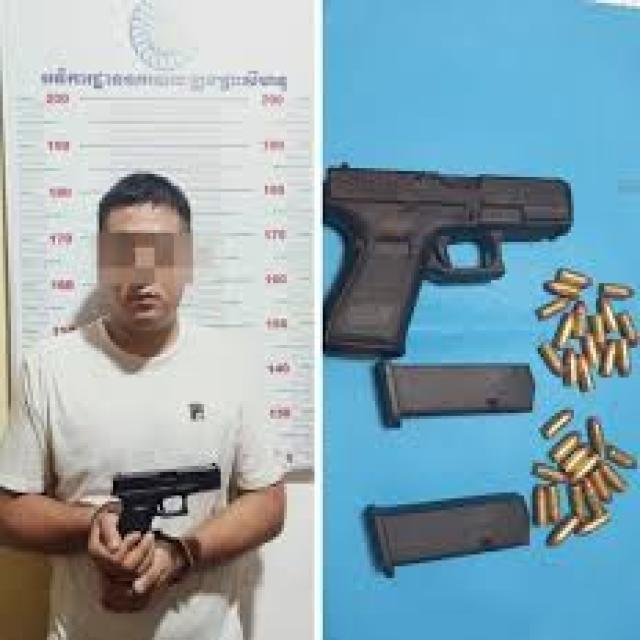

In [19]:
results = model('/content/dataset/valid/images/-50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg')

# Mostrar el resultado de la primera imagen de la lista
results[0].show()


In [21]:
results[0].save(filename='/content/resultados/-50_deteccion.jpg')


'/content/resultados/-50_deteccion.jpg'

🔎 Procesando: -104_jpeg_jpg.rf.0bf4e26dac9315afa0aea29ae6af31d1.jpg

image 1/1 /content/dataset/valid/images/-104_jpeg_jpg.rf.0bf4e26dac9315afa0aea29ae6af31d1.jpg: 640x640 (no detections), 239.2ms
Speed: 4.2ms preprocess, 239.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


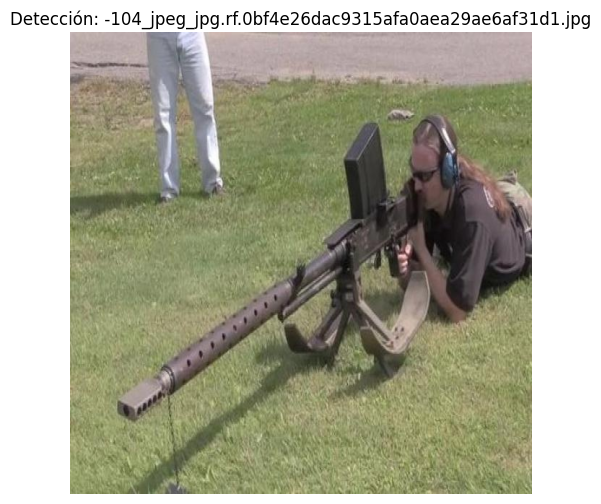

🔎 Procesando: -25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg

image 1/1 /content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg: 640x640 (no detections), 445.7ms
Speed: 6.0ms preprocess, 445.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


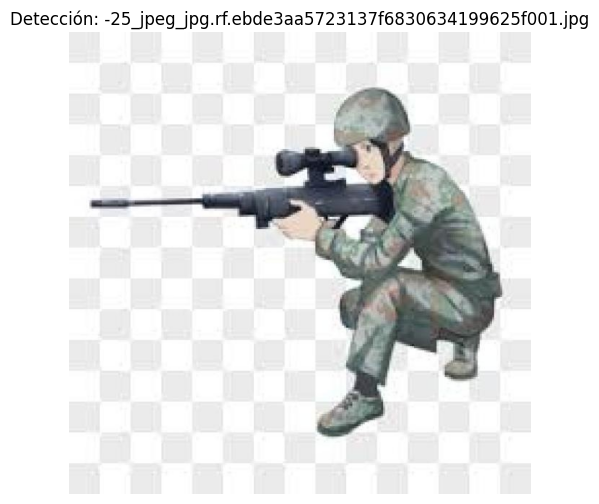

🔎 Procesando: -138_jpeg_jpg.rf.a9bb2ec0c5d35f4030cc6085341807f6.jpg

image 1/1 /content/dataset/valid/images/-138_jpeg_jpg.rf.a9bb2ec0c5d35f4030cc6085341807f6.jpg: 640x640 (no detections), 1103.0ms
Speed: 4.2ms preprocess, 1103.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


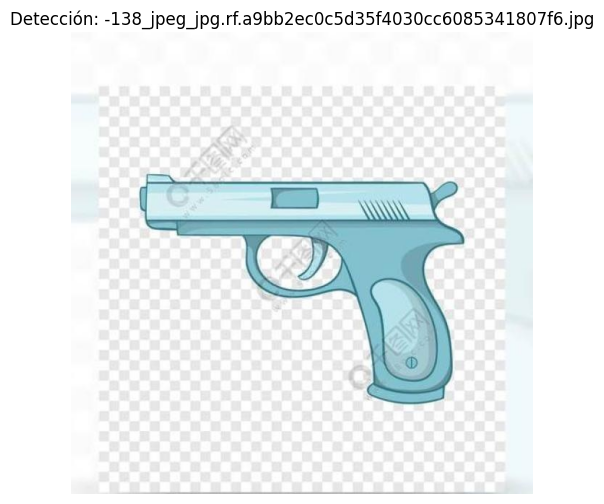

🔎 Procesando: -31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg

image 1/1 /content/dataset/valid/images/-31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg: 640x640 (no detections), 372.7ms
Speed: 4.2ms preprocess, 372.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


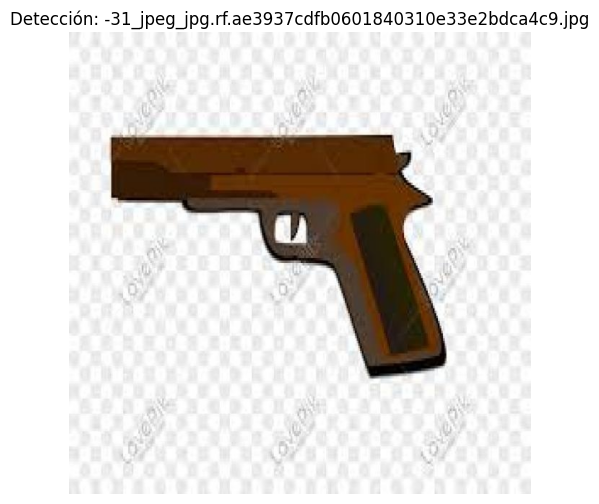

🔎 Procesando: -121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg

image 1/1 /content/dataset/valid/images/-121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg: 640x640 (no detections), 368.0ms
Speed: 8.7ms preprocess, 368.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


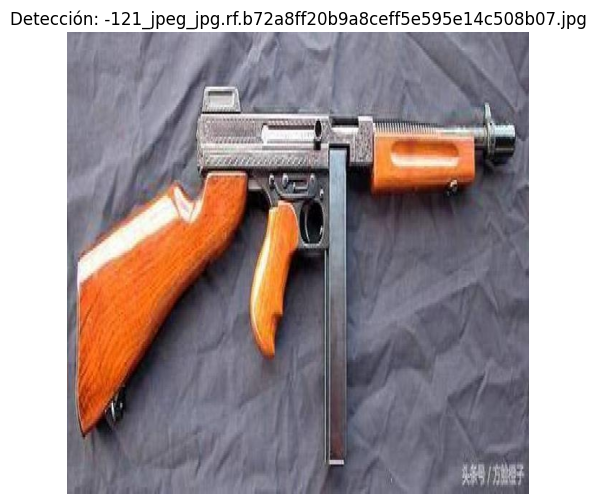

In [22]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Carpeta de imágenes a usar
image_paths = glob('/content/dataset/valid/images/*.jpg')  # o *.png según tu dataset

# Crear carpeta para guardar resultados
import os
os.makedirs('/content/resultados', exist_ok=True)

# Visor en bucle
for path in image_paths[:5]:  # ← cambia el número para ver más imágenes
    print(f"🔎 Procesando: {os.path.basename(path)}")

    results = model(path)
    results[0].save(filename=f"/content/resultados/{os.path.basename(path)}")

    # Cargar y mostrar
    img_result = cv2.imread(f"/content/resultados/{os.path.basename(path)}")
    img_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Detección: {os.path.basename(path)}")
    plt.show()


In [28]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Modelo base
model.train(data='/content/dataset/data.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/dataset/train/labels.cache... 37 images, 20 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 707.1±195.2 MB/s, size: 43.5 KB)



val: Scanning /content/dataset/valid/labels.cache... 8 images, 8 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]

Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.008      2.982       1.58         18        640: 100%|██████████| 4/4 [00:49<00:00, 12.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]

                   all         16          9    0.00187          1      0.141     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.6952      2.637      1.281         15        640: 100%|██████████| 4/4 [00:47<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         16          9    0.00187          1        0.4      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8143      2.493      1.394          8        640: 100%|██████████| 4/4 [00:47<00:00, 11.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

                   all         16          9    0.00187          1       0.43      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8347      2.098      1.407         14        640: 100%|██████████| 4/4 [00:47<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.00s/it]

                   all         16          9    0.00187          1      0.489      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      0.793      1.906      1.307         20        640: 100%|██████████| 4/4 [00:48<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]

                   all         16          9    0.00187          1      0.706      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.7591      1.796      1.342         15        640: 100%|██████████| 4/4 [00:50<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all         16          9    0.00187          1      0.783      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.7814      1.986      1.366          8        640: 100%|██████████| 4/4 [00:49<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9    0.00187          1      0.688      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      0.684      1.752      1.252         14        640: 100%|██████████| 4/4 [00:48<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9    0.00269          1      0.521      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8282      1.756      1.346         18        640: 100%|██████████| 4/4 [00:48<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]

                   all         16          9       0.12          1      0.575       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8636      2.077      1.425          9        640: 100%|██████████| 4/4 [00:47<00:00, 11.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9      0.812      0.485      0.687      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.9483      1.873      1.438         15        640: 100%|██████████| 4/4 [00:47<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9      0.595      0.494      0.656      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9107      1.924      1.425         16        640: 100%|██████████| 4/4 [00:47<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9       0.69      0.333      0.543      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9502       1.87      1.486         11        640: 100%|██████████| 4/4 [00:49<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all         16          9      0.744      0.667      0.573      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.9566      1.855      1.451         13        640: 100%|██████████| 4/4 [00:46<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

                   all         16          9      0.733      0.667      0.606       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.8923      1.762      1.412         17        640: 100%|██████████| 4/4 [00:46<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]

                   all         16          9      0.438      0.522      0.398      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.8915      1.726      1.454         13        640: 100%|██████████| 4/4 [00:47<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

                   all         16          9      0.399      0.444      0.435      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7109      1.478       1.29         13        640: 100%|██████████| 4/4 [00:50<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]

                   all         16          9      0.542      0.556      0.441      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8155      1.551      1.359         17        640: 100%|██████████| 4/4 [00:47<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         16          9      0.161      0.333      0.239      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9018      1.676      1.414         14        640: 100%|██████████| 4/4 [00:46<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]

                   all         16          9       0.12       0.41      0.107     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9702      1.521      1.414         19        640: 100%|██████████| 4/4 [00:47<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]

                   all         16          9      0.129      0.333      0.146     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8457      1.471      1.388         19        640: 100%|██████████| 4/4 [00:46<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         16          9      0.321      0.222      0.195     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.9157      1.824      1.466          9        640: 100%|██████████| 4/4 [00:46<00:00, 11.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9      0.246      0.333      0.185     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7916      1.566      1.356         16        640: 100%|██████████| 4/4 [00:46<00:00, 11.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         16          9      0.168      0.333      0.158     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.7736      1.405      1.332         17        640: 100%|██████████| 4/4 [00:46<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         16          9      0.179      0.333      0.143     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8388      1.504      1.354         14        640: 100%|██████████| 4/4 [00:46<00:00, 11.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9      0.159      0.333      0.119       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8878      1.435      1.419         14        640: 100%|██████████| 4/4 [00:46<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         16          9       0.58      0.222      0.202      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8018      1.473      1.274         16        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         16          9      0.229      0.111     0.0797     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.8443       1.64      1.372         10        640: 100%|██████████| 4/4 [00:46<00:00, 11.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         16          9      0.122      0.356      0.115      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8677      1.436      1.374         19        640: 100%|██████████| 4/4 [00:46<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]

                   all         16          9      0.151      0.333      0.146     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8682      1.366      1.354         13        640: 100%|██████████| 4/4 [00:47<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         16          9      0.224      0.444      0.171     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7775      1.288      1.265         19        640: 100%|██████████| 4/4 [00:46<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.13s/it]

                   all         16          9      0.299      0.444       0.21     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8536      1.618      1.486         11        640: 100%|██████████| 4/4 [00:47<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         16          9      0.279      0.444      0.217       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7161      1.282      1.249         17        640: 100%|██████████| 4/4 [00:47<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all         16          9      0.341      0.556      0.337      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.699      1.217      1.227         19        640: 100%|██████████| 4/4 [00:47<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.87s/it]

                   all         16          9      0.315      0.667      0.311      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6972       1.27      1.257         17        640: 100%|██████████| 4/4 [00:48<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         16          9      0.291      0.556      0.305      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.8093      1.389      1.389         12        640: 100%|██████████| 4/4 [00:48<00:00, 12.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9      0.646      0.667      0.636      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6662      1.184       1.24         15        640: 100%|██████████| 4/4 [00:47<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         16          9      0.708      0.556      0.736      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6892      1.196      1.275         19        640: 100%|██████████| 4/4 [00:47<00:00, 11.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         16          9      0.458      0.751       0.62       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6889      1.124      1.248         14        640: 100%|██████████| 4/4 [00:46<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]

                   all         16          9      0.475      0.778      0.637       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7014      1.062      1.216         17        640: 100%|██████████| 4/4 [00:46<00:00, 11.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         16          9      0.625      0.778      0.715      0.417


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5672       1.61      1.238          4        640: 100%|██████████| 4/4 [00:49<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         16          9       0.63      0.759      0.712      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5005      1.554      1.177          4        640: 100%|██████████| 4/4 [00:46<00:00, 11.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]

                   all         16          9      0.402      0.889      0.561      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.645      1.507      1.375          7        640: 100%|██████████| 4/4 [00:46<00:00, 11.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         16          9      0.594      0.651      0.593      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      0.654      1.489      1.347          6        640: 100%|██████████| 4/4 [00:46<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         16          9      0.497      0.667      0.435      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5095      1.614      1.142          5        640: 100%|██████████| 4/4 [00:46<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]

                   all         16          9      0.495      0.653      0.381      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5067      1.523      1.205          8        640: 100%|██████████| 4/4 [00:47<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         16          9      0.413      0.667      0.414      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4894      1.479      1.139          6        640: 100%|██████████| 4/4 [00:47<00:00, 11.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]

                   all         16          9      0.454      0.556      0.506      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4375      1.363      1.124          6        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]

                   all         16          9       0.61      0.556        0.6      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5381      1.436      1.198          5        640: 100%|██████████| 4/4 [00:47<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         16          9       0.61      0.556      0.611      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4449      1.379      1.221          8        640: 100%|██████████| 4/4 [00:47<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         16          9      0.699      0.556      0.623      0.439



50 epochs completed in 0.728 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.00s/it]


                   all         16          9    0.00187          1      0.783       0.57
Speed: 2.5ms preprocess, 297.9ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cff75c5810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [29]:
import os
from glob import glob

def encontrar_modelo_entrenado():
    rutas = sorted(glob('/content/runs/detect/train*/weights/*.pt'), reverse=True)

    if not rutas:
        print("❌ No se encontró ningún archivo .pt (modelo entrenado).")
        return None

    print("✅ Modelos encontrados:")
    for ruta in rutas:
        print("  -", ruta)

    return rutas[0]  # El más reciente

# Buscar modelo más reciente
ruta_modelo = encontrar_modelo_entrenado()

# Cargar si existe
if ruta_modelo:
    from ultralytics import YOLO
    model = YOLO(ruta_modelo)
    print(f"✅ Modelo cargado: {ruta_modelo}")
else:
    print("⚠️ Entrena un modelo antes de continuar.")


✅ Modelos encontrados:
  - /content/runs/detect/train6/weights/last.pt
  - /content/runs/detect/train6/weights/best.pt
  - /content/runs/detect/train5/weights/last.pt
  - /content/runs/detect/train5/weights/best.pt
  - /content/runs/detect/train3/weights/last.pt
  - /content/runs/detect/train3/weights/best.pt
  - /content/runs/detect/train2/weights/last.pt
  - /content/runs/detect/train2/weights/best.pt
✅ Modelo cargado: /content/runs/detect/train6/weights/last.pt



🔍 Procesando: -104_jpeg_jpg.rf.0bf4e26dac9315afa0aea29ae6af31d1.jpg

image 1/1 /content/dataset/valid/images/-104_jpeg_jpg.rf.0bf4e26dac9315afa0aea29ae6af31d1.jpg: 640x640 2 armas, 234.3ms
Speed: 5.0ms preprocess, 234.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 2


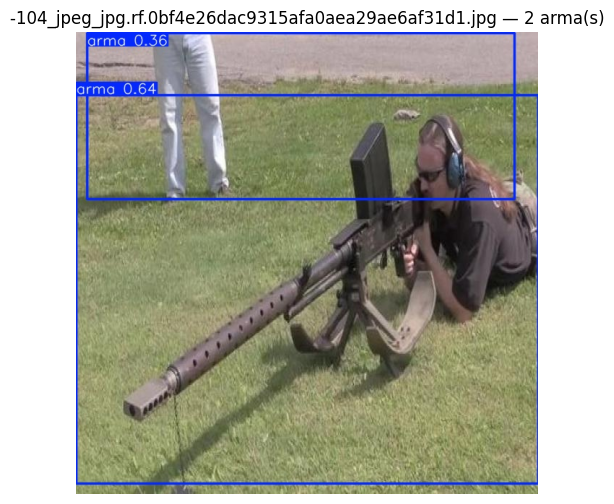


🔍 Procesando: -25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg

image 1/1 /content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg: 640x640 (no detections), 257.9ms
Speed: 5.0ms preprocess, 257.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


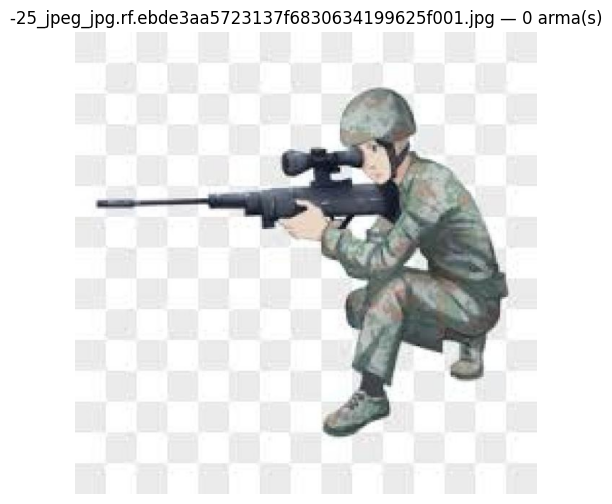


🔍 Procesando: -138_jpeg_jpg.rf.a9bb2ec0c5d35f4030cc6085341807f6.jpg

image 1/1 /content/dataset/valid/images/-138_jpeg_jpg.rf.a9bb2ec0c5d35f4030cc6085341807f6.jpg: 640x640 1 arma, 244.0ms
Speed: 4.9ms preprocess, 244.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


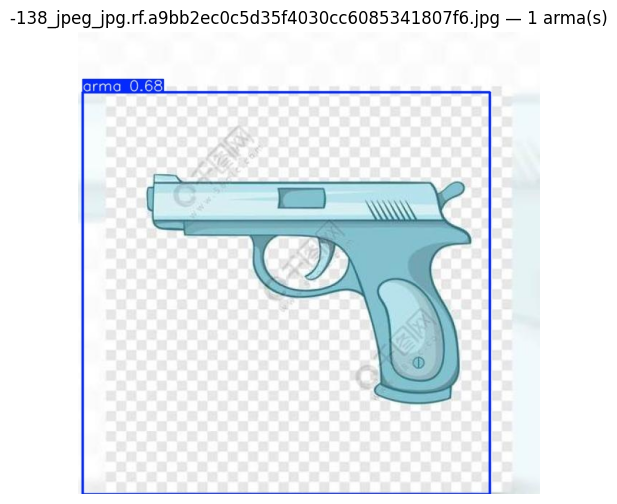


🔍 Procesando: -31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg

image 1/1 /content/dataset/valid/images/-31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg: 640x640 1 arma, 241.4ms
Speed: 4.0ms preprocess, 241.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


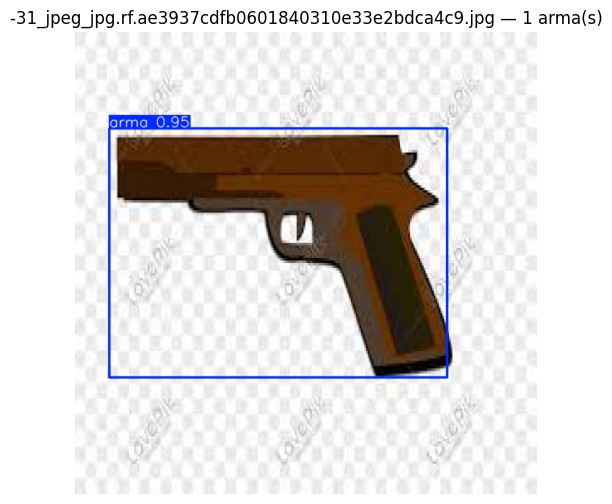


🔍 Procesando: -121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg

image 1/1 /content/dataset/valid/images/-121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg: 640x640 1 arma, 276.8ms
Speed: 4.5ms preprocess, 276.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


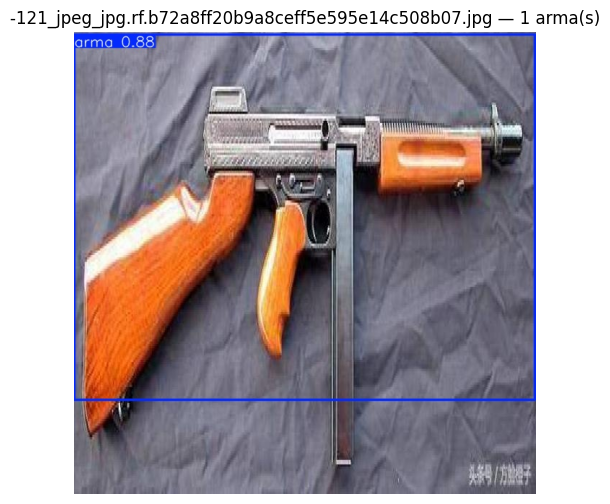


🔍 Procesando: -19_jpeg_jpg.rf.62b82f75eb3c0c970ac176e3e202a969.jpg

image 1/1 /content/dataset/valid/images/-19_jpeg_jpg.rf.62b82f75eb3c0c970ac176e3e202a969.jpg: 640x640 1 arma, 272.7ms
Speed: 6.4ms preprocess, 272.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


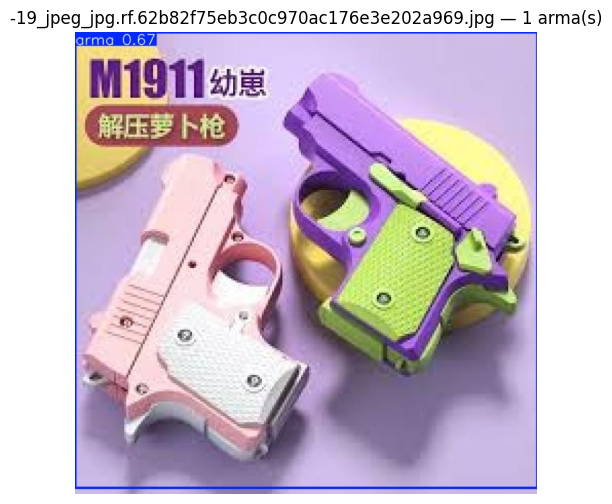


🔍 Procesando: -48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg

image 1/1 /content/dataset/valid/images/-48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg: 640x640 (no detections), 284.2ms
Speed: 4.7ms preprocess, 284.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


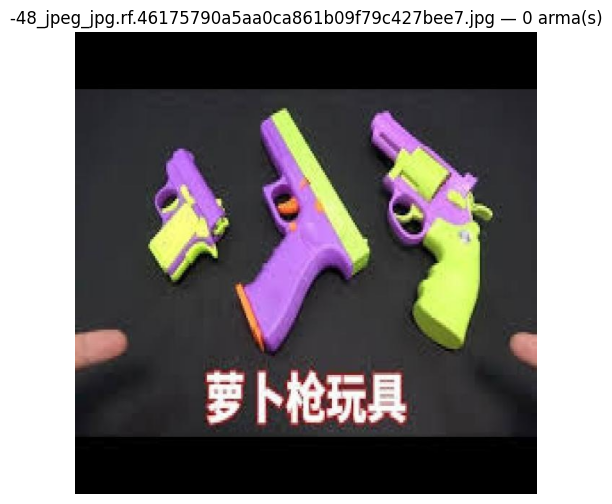


🔍 Procesando: -79_jpeg_jpg.rf.4ec1dcab6de723110386377bf7a81e4e.jpg

image 1/1 /content/dataset/valid/images/-79_jpeg_jpg.rf.4ec1dcab6de723110386377bf7a81e4e.jpg: 640x640 1 arma, 265.5ms
Speed: 4.7ms preprocess, 265.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


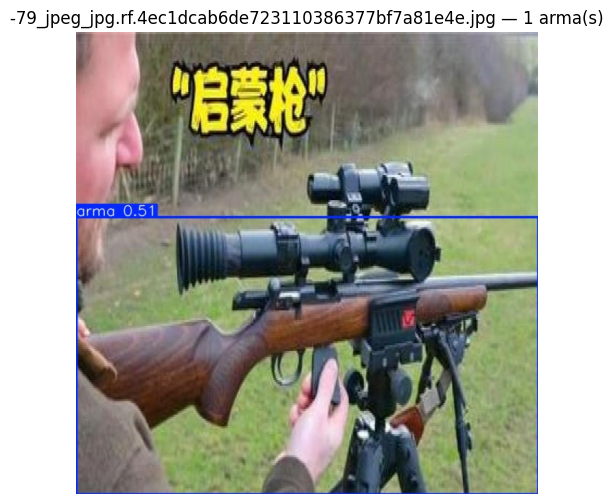


🔍 Procesando: -72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg

image 1/1 /content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg: 640x640 1 arma, 300.8ms
Speed: 4.4ms preprocess, 300.8ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


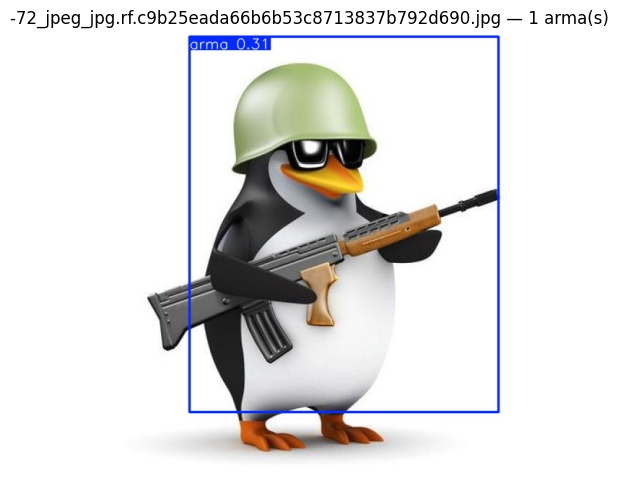


🔍 Procesando: -67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg

image 1/1 /content/dataset/valid/images/-67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg: 640x640 1 arma, 281.2ms
Speed: 6.7ms preprocess, 281.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


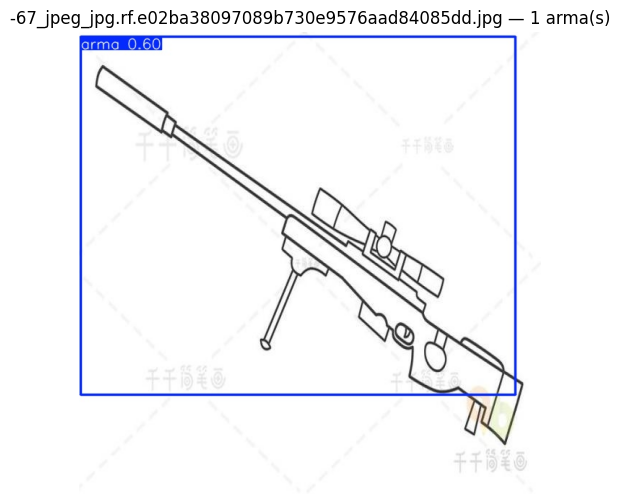

In [30]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os

# Ruta de imágenes de validación
image_paths = glob('/content/dataset/valid/images/*.jpg')

# Crear carpeta de resultados si no existe
os.makedirs('/content/resultados', exist_ok=True)

# Procesar imágenes
for path in image_paths[:10]:  # Puedes cambiar el número para ver más imágenes
    filename = os.path.basename(path)
    print(f"\n🔍 Procesando: {filename}")

    # Inferencia
    results = model(path)
    results[0].save(filename=f"/content/resultados/{filename}")

    # Conteo de armas detectadas
    num_armas = len(results[0].boxes)
    print(f"📦 Armas detectadas: {num_armas}")

    # Mostrar imagen resultante
    img = cv2.imread(f"/content/resultados/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{filename} — {num_armas} arma(s)")
    plt.show()


actualizacion notbook